# Tut-21 : CodeBasics 
# Ensemble Learning

Ensemble Learning :
    Ensemble learning is a machine learning technique where multiple models, often of differing types, are combined to solve a particular problem. The idea behind ensemble learning is to leverage the strengths of different models and mitigate their individual weaknesses, ultimately leading to better predictive performance compared to any single model.

To tackle the overfit problem, We take a sample of complete dataset :
It is of 2 types :

1. 

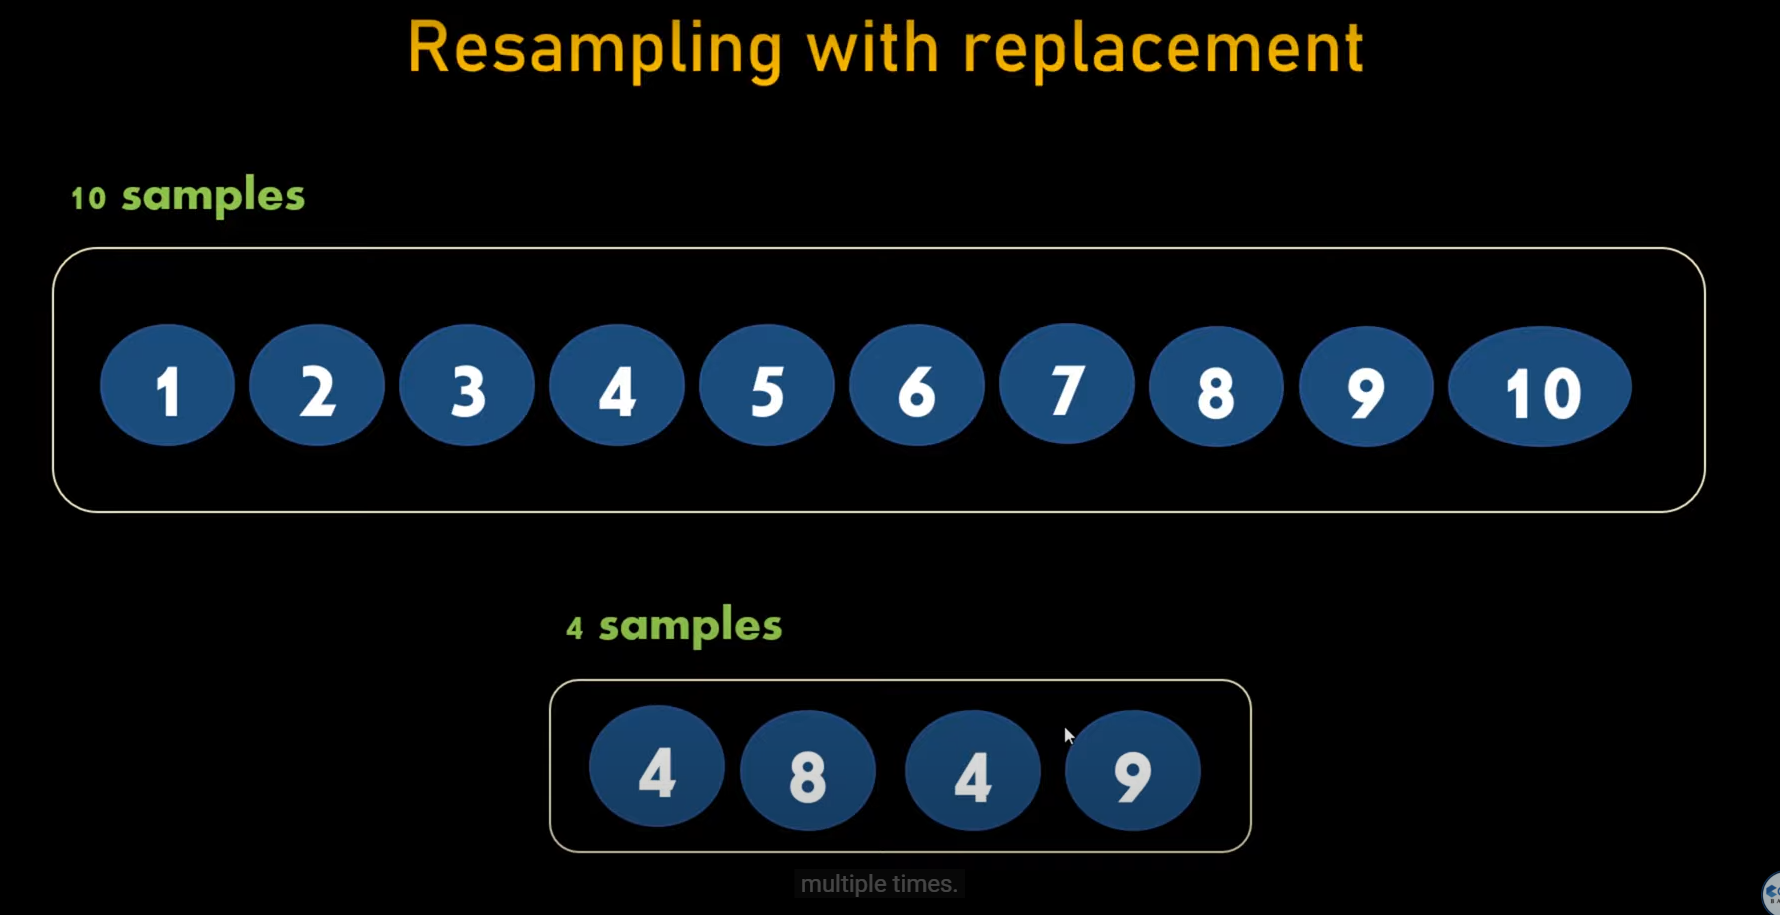
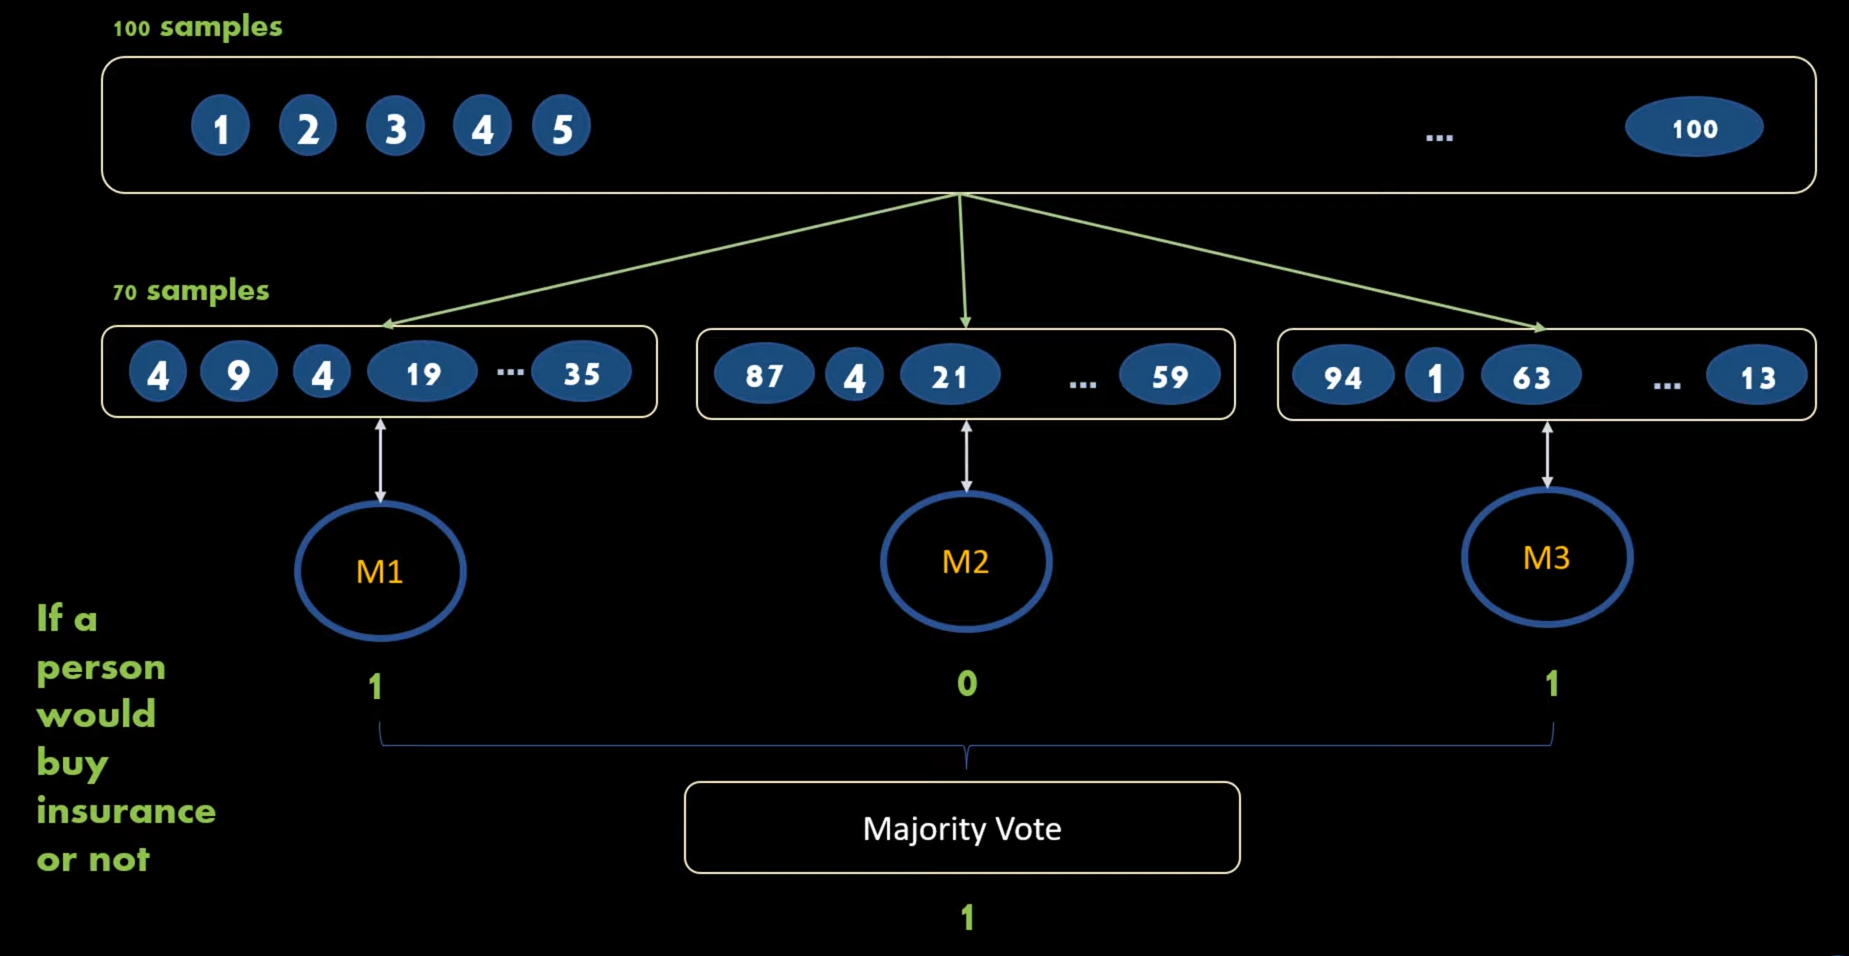
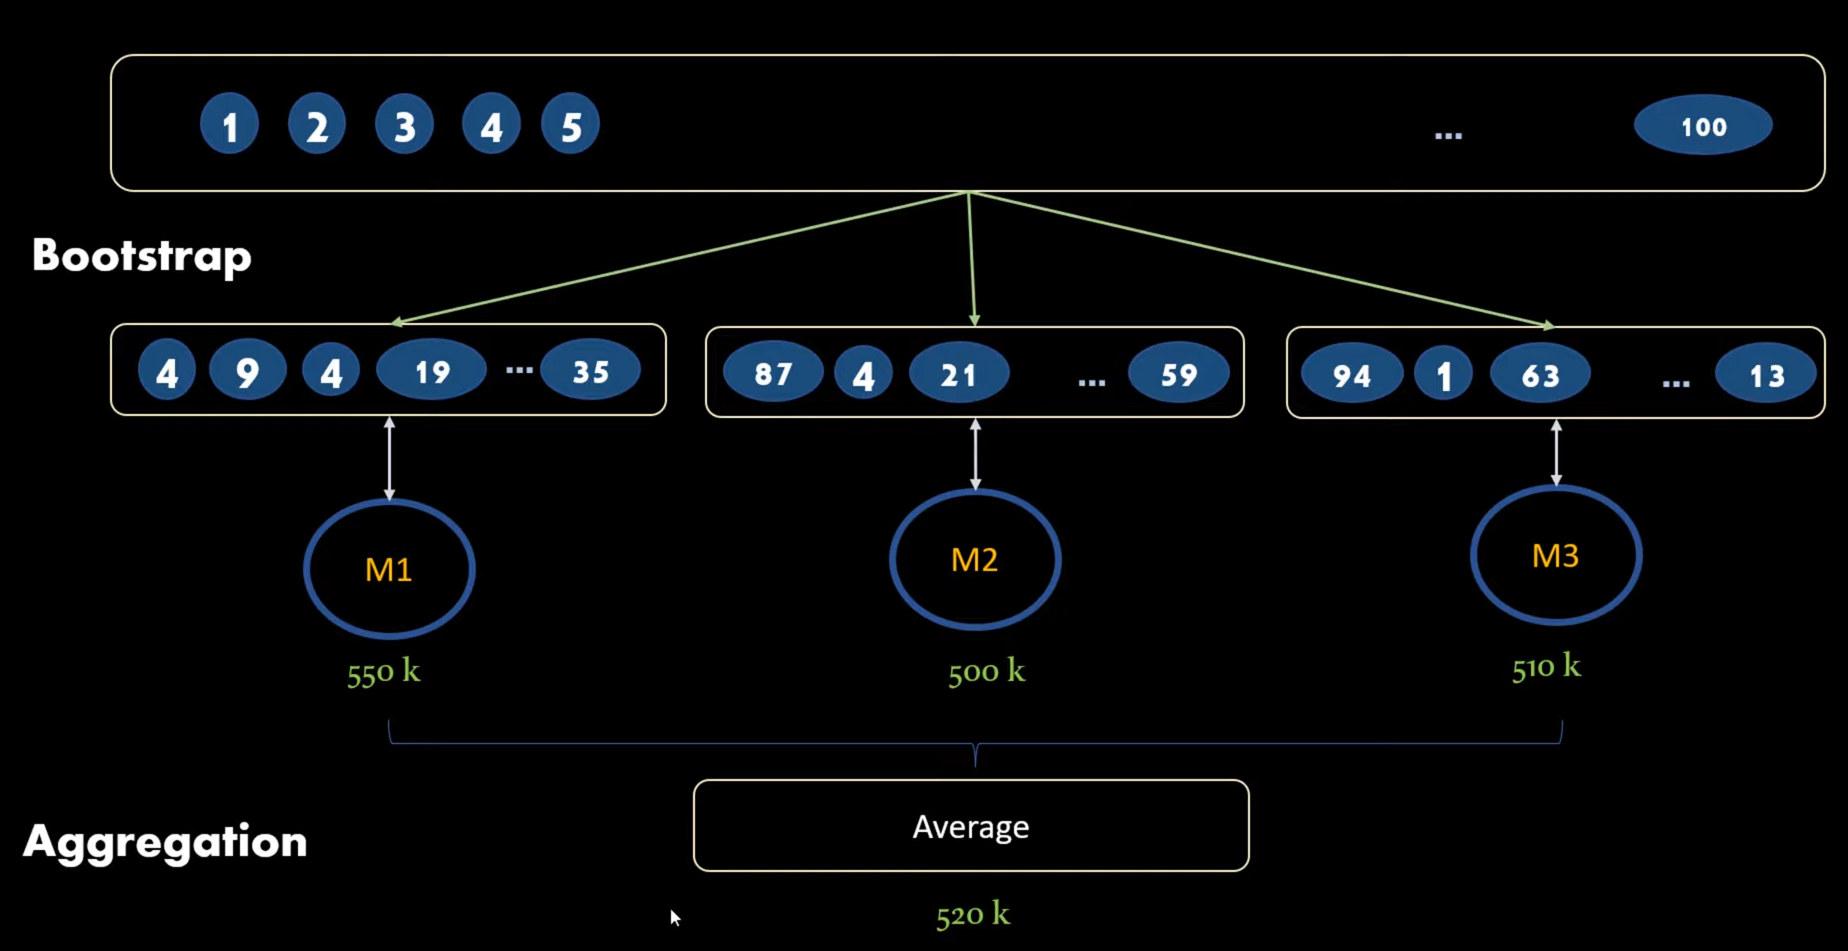

Random Forest is one of the Bagging techniques

Rondom Forest :
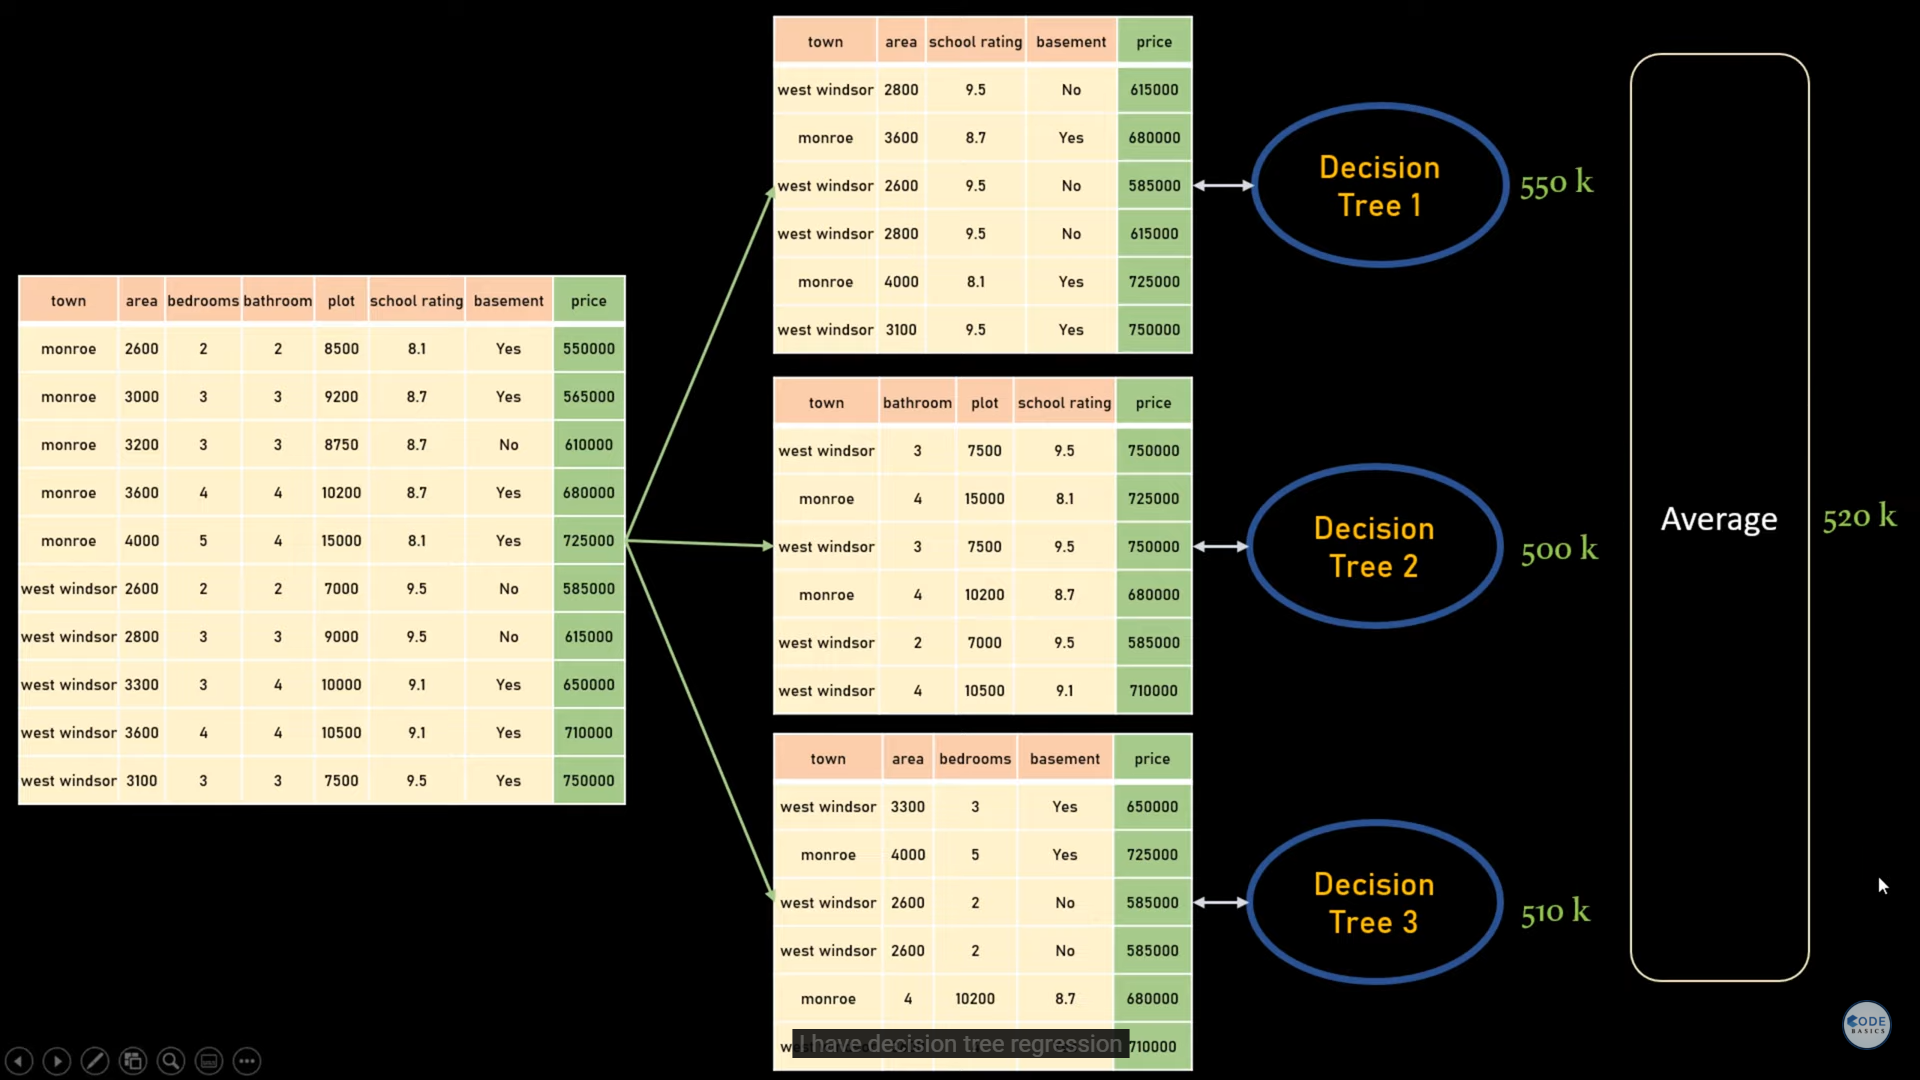


Difference between bagging and bagged tree
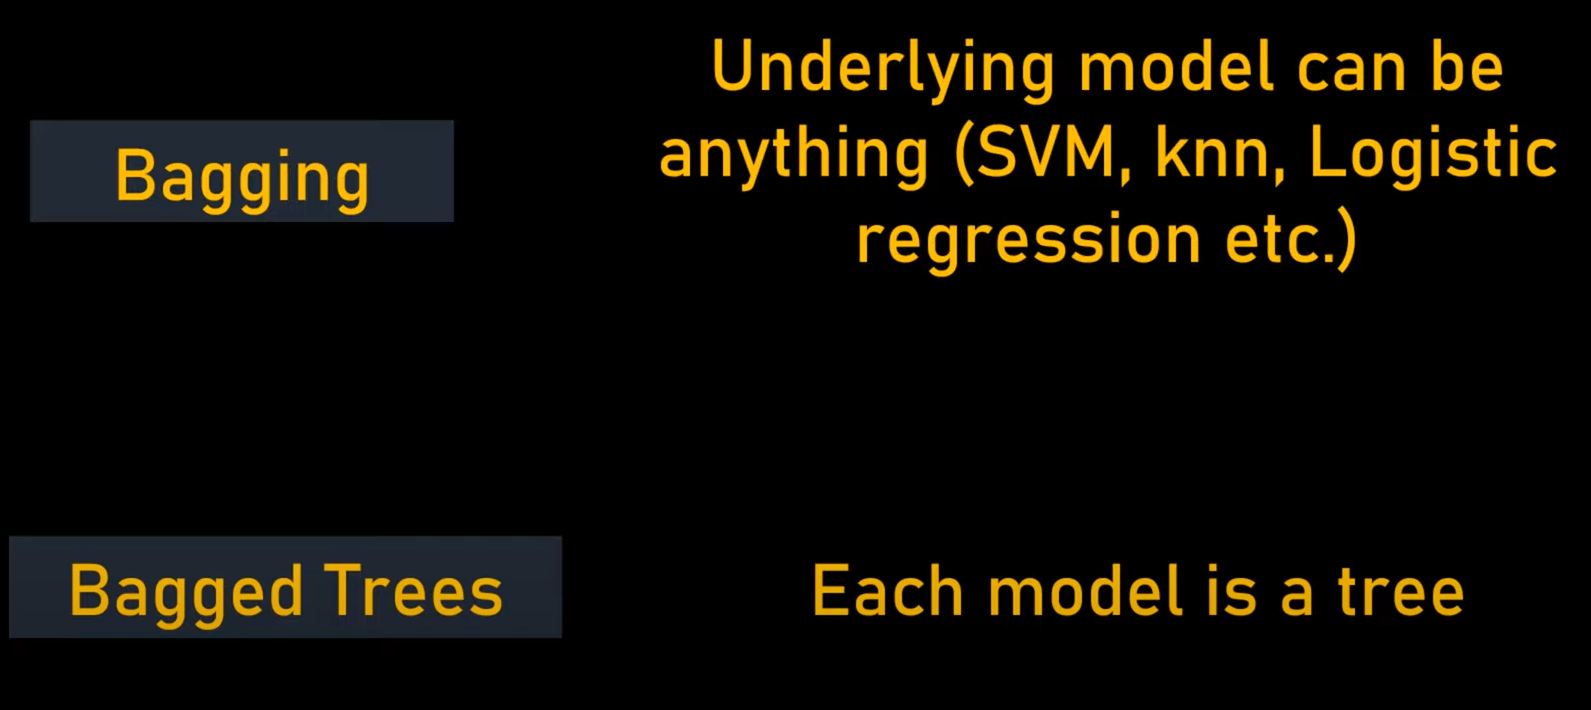

In [1]:
import pandas as pd

In [6]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [11]:
x = df.drop(['Outcome'] , axis='columns')
y = df['Outcome']

In [14]:
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()
x_scl = scl.fit_transform(x)
x_scl[:3]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415]])

In [15]:
from sklearn.model_selection import train_test_split

xtr , xts ,ytr ,yts = train_test_split( x_scl , y , test_size=0.2 , stratify=y , random_state=2 )

In [16]:
xtr.shape

(614, 8)

In [17]:
ytr.value_counts()

0    400
1    214
Name: Outcome, dtype: int64

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

scr = cross_val_score( DecisionTreeClassifier() , x_scl , y , cv=5 )
scr

array([0.69480519, 0.66883117, 0.68181818, 0.79084967, 0.7124183 ])

In [21]:
scr.mean()

0.7097445038621509

In [25]:
from sklearn.ensemble import BaggingClassifier

bagMod = BaggingClassifier(
    base_estimator =  DecisionTreeClassifier() ,
    n_estimators = 100  ,
    max_samples = 0.8 ,
    oob_score=True ,
    random_state=0
)

# oob - Out of Bag (The leftover sample which have not appeared in any split )

In [26]:
bagMod.fit( xtr , ytr)
bagMod.oob_score_

0.758957654723127

In [27]:
bagMod.score( xts , yts )

0.7337662337662337

In [28]:
scr = cross_val_score( bagMod , x_scl , y , cv=5 )
scr.mean()

0.7591800356506239

In [31]:
# lets also try RandomForest

from sklearn.ensemble import RandomForestClassifier

scr = cross_val_score( RandomForestClassifier() , x_scl , y , cv=5 )
scr.mean()

0.7696035990153638